In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(1)

In [3]:
def rbf(data_point, center, var):
    #return np.exp(-1.0/(2*var)*(data_point - center)**2)
    #return np.exp(-1.0/(2*var)*(data_point - center).T.dot((data_point - center)))
    return np.exp(-np.diag((data_point - center).dot((data_point - center).T))/(2*var))

In [4]:
# wrap everything up until now into a class
class RBFNet(object):
    def __init__(self, centers, variances, nDim = 1, eta = 0.05, epochs = 1000):
        self.centers = centers
        self.variances = variances
        self.eta = eta
        self.epochs = epochs
        self.weights = np.random.normal(0,1, centers.shape)
        #self.bias = np.random.normal(0,1, 1)[:,np.newaxis]
        
    def fitLeastSquares(self,x,y):
        self.Phi = np.asarray([rbf(x,center, var) \
                               for center,var in zip(self.centers, self.variances)])#.squeeze()
        self.weights = np.linalg.pinv(self.Phi).T.dot(y)
        #self.bias = 0
        return self
    
    def fitDelta(self, x, y):
        self.Phi = np.asarray([rbf(x,center, var) \
                               for center,var in zip(self.centers, self.variances)])#.squeeze()
        self.res_errors = []
        for _ in range(self.epochs):
            for i in range(len(x)):
                error =  y[i] - (self.Phi[:,i].T.dot(self.weights))# + self.bias)
                error = error.reshape(-1,centers.shape[1])
                delta_weight = self.Phi[:,i][:,np.newaxis].dot(error)
                #delta_bias = error.sum()
                self.weights += self.eta*delta_weight
                #self.bias += eta*delta_bias

            avg_res_error = np.mean(np.abs(y - (self.Phi.T.dot(self.weights) )))#\
                                          #+ self.bias*np.ones((self.Phi.shape[1],1)))))
            self.res_errors.append(avg_res_error)
        return self
    
    def predict(self,x):
        self.Phi = np.asarray([rbf(x,center, var) \
                               for center,var in zip(self.centers, self.variances)])#.squeeze()
        #remember that the bias term is set to be zero for the least squares solution
        predictions = self.Phi.T.dot(self.weights) #+ self.bias*np.ones((self.Phi.shape[1],1))
        return predictions
    
    def predictThresholded(self,x):
        self.Phi = np.asarray([rbf(x,center, var) \
                               for center,var in zip(self.centers, self.variances)])#.squeeze()
        #remember that the bias term is set to be zero for the least squares solution
        predictions = self.Phi.T.dot(self.weights) #+ self.bias*np.ones((self.Phi.shape[1],1))
        return np.sign(predictions)

### Least Squares Estimate without Noise

Training error with manually selected centers is  0.000910063468694
Training error with randomly selected centers is  0.0151553439421


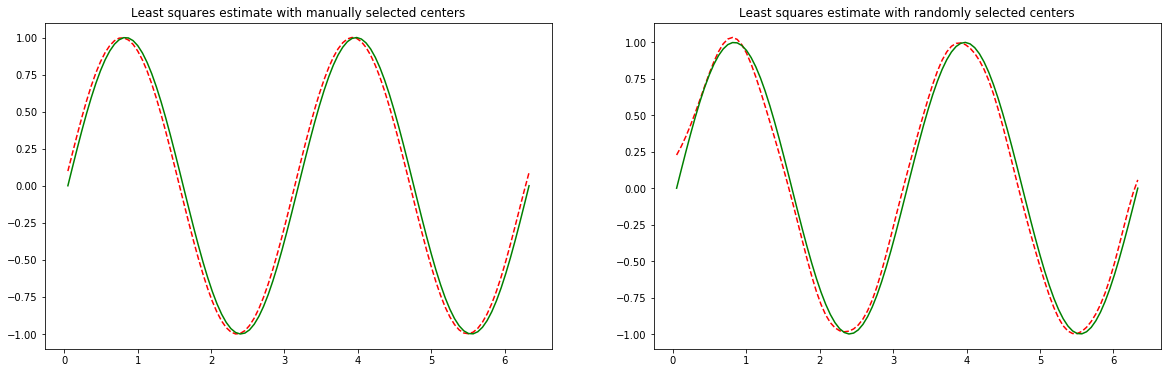

In [5]:
np.random.seed(1)
x = np.linspace(0, 2*np.pi, 100)[:,np.newaxis]
y = np.sin(2*x)

nCenters = 19
#select the centers homogeneously
centers = np.linspace(0, 2*np.pi, nCenters)[:,np.newaxis]
# or random
random_idx = np.random.permutation(len(x))
centers_random = [x[random_idx[i]] for i in range(nCenters)]
centers = np.array(centers)
centers_random = np.array(centers_random)

variances = 0.3*np.ones(nCenters)

RBF = RBFNet(centers, variances)
RBF.fitLeastSquares(x,y)
RBF_random_centers = RBFNet(centers_random, variances)
RBF_random_centers.fitLeastSquares(x,y)
print('Training error with manually selected centers is ', np.mean(np.abs(y - RBF.predict(x))))
print('Training error with randomly selected centers is ', np.mean(np.abs(y - RBF_random_centers.predict(x))))


x_test = np.linspace(0.05, 2*np.pi + 0.05, 100)[:,np.newaxis]
y_test = np.sin(2*x)
fig = plt.figure(figsize=(20, 6)) 
plt.subplot(121)
plt.title('Least squares estimate with manually selected centers')
plt.plot(x_test, RBF.predict(x_test), 'r--')
plt.plot(x_test,y_test, 'g-')
plt.subplot(122)
plt.title('Least squares estimate with randomly selected centers')
plt.plot(x_test, RBF_random_centers.predict(x_test), 'r--')
plt.plot(x_test,y_test, 'g-')

Training error with manually selected centers is  0.0
Training error with randomly selected centers is  0.0


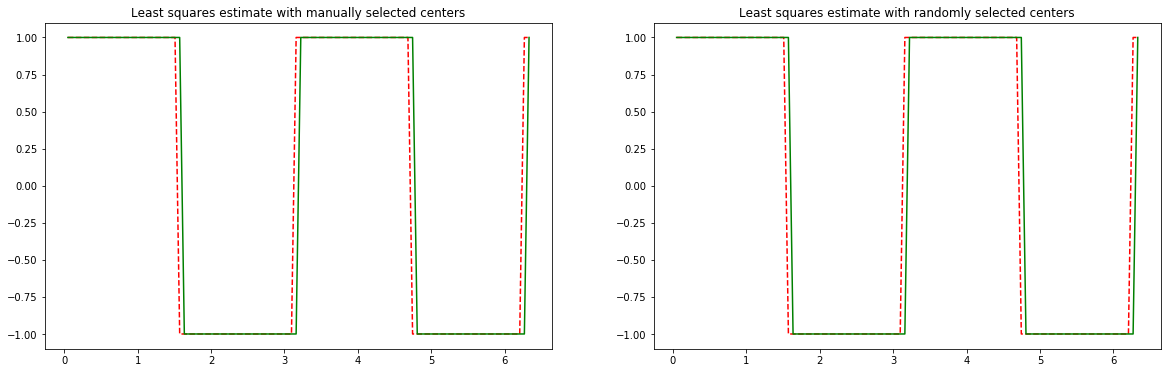

In [6]:
np.random.seed(1)
x = np.linspace(0.001, 2*np.pi + 0.001, 100)[:,np.newaxis]
y = np.sign(np.sin(2*x))

nCenters = 15
#select the centers homogeneously
centers = np.linspace(0, 2*np.pi, nCenters)[:,np.newaxis]
# or random
centers_random = [x[random_idx[i]] for i in range(nCenters)]
random_idx = np.random.permutation(len(x))
centers = np.array(centers)
centers_random = np.array(centers_random)

variances = 0.3*np.ones(nCenters)

RBF = RBFNet(centers, variances)
RBF.fitLeastSquares(x,y)
RBF_random_centers = RBFNet(centers_random, variances)
RBF_random_centers.fitLeastSquares(x,y)
print('Training error with manually selected centers is ', np.mean(np.abs(y - RBF.predictThresholded(x))))
print('Training error with randomly selected centers is ', np.mean(np.abs(y - RBF_random_centers.predictThresholded(x))))


x_test = np.linspace(0.05, 2*np.pi + 0.05, 100)[:,np.newaxis]
y_test = np.sign(np.sin(2*x))
fig = plt.figure(figsize=(20, 6)) 
plt.subplot(121)
plt.title('Least squares estimate with manually selected centers')
plt.plot(x_test, RBF.predictThresholded(x_test), 'r--')
plt.plot(x_test,y_test, 'g-')
plt.subplot(122)
plt.title('Least squares estimate with randomly selected centers')
plt.plot(x_test, RBF_random_centers.predictThresholded(x_test), 'r--')
plt.plot(x_test,y_test, 'g-')

### Delta Rule Estimate Without Noise

Final error is 0.00101117020887


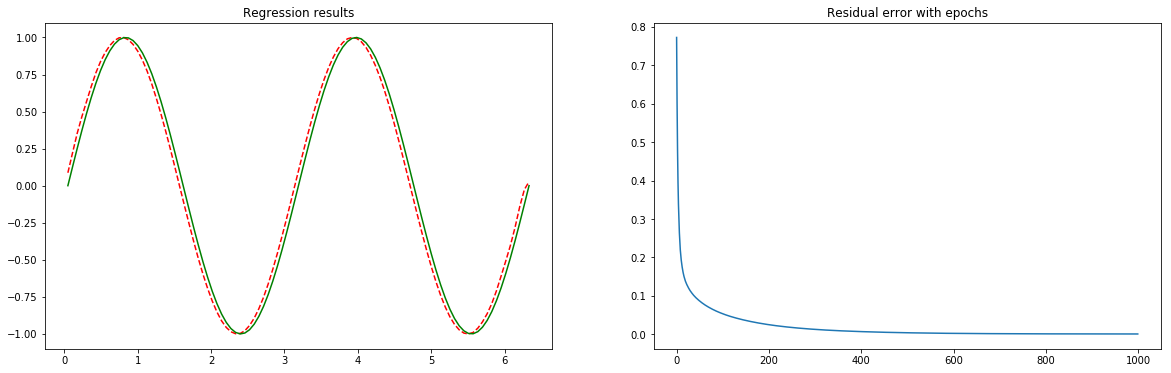

In [7]:
np.random.seed(1)
x = np.linspace(0, 2*np.pi, 100)[:,np.newaxis]
y = np.sin(2*x) 

nCenters = 45
#select the centers homogeneously
centers = np.linspace(0, 2*np.pi, nCenters)[:,np.newaxis]
centers = np.array(centers)
variances = 0.01*np.ones(nCenters)
RBF = RBFNet(centers, variances, epochs=1000)
RBF.fitDelta(x,y)

x_test = np.linspace(0.05, 2*np.pi + 0.05, 100)[:,np.newaxis]
y_test = np.sin(2*x)
fig = plt.figure(figsize=(20, 6)) 
plt.subplot(121)
plt.title('Regression results')
plt.plot(x_test, RBF.predict(x_test), 'r--')
plt.plot(x_test,y_test, 'g-')
plt.subplot(122)
plt.title('Residual error with epochs')
plt.plot(RBF.res_errors)
print("Final error is", RBF.res_errors[-1])

Final error is 0.0724689245021


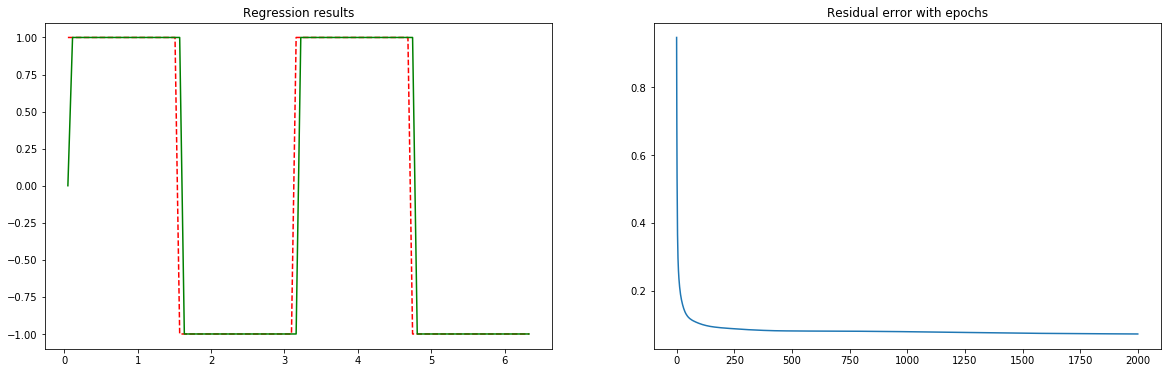

In [8]:
np.random.seed(1)
x = np.linspace(0, 2*np.pi, 100)[:,np.newaxis]
y = np.sign(np.sin(2*x)) #+ np.random.normal(0, np.sqrt(0.1), 100)[:,np.newaxis]

nCenters = 55
#select the centers homogeneously
centers = np.linspace(0, 2*np.pi, nCenters)[:,np.newaxis]
centers = np.array(centers)
variances = 0.01*np.ones(nCenters)
RBF = RBFNet(centers, variances, epochs=2000)
RBF.fitDelta(x,y)

x_test = np.linspace(0.05, 2*np.pi + 0.05, 100)[:,np.newaxis]
y_test = np.sign(np.sin(2*x))
fig = plt.figure(figsize=(20, 6)) 
plt.subplot(121)
plt.title('Regression results')
plt.plot(x_test, RBF.predictThresholded(x_test), 'r--')
plt.plot(x_test,y_test, 'g-')
plt.subplot(122)
plt.title('Residual error with epochs')
plt.plot(RBF.res_errors)
print("Final error is", RBF.res_errors[-1])

# 3.1
* Please discuss the results, how many units are needed for the aforementioned error thresholds?

Depends on the variance value but less than 20 was enough to reach the lowest training errors.
* How can you simply transform the output of your RBF network to reduce the residual error to 0 for the square(2x) problem? Still, how many units do you need? In what type of applications could this transform be particularly useful?

Thresholding the output. I would expect two times per cycle to be enough - that would be nyquist sampling value for a sign wave. Surprisingly we needed ~4 times that. Probably playing around with the variance AND more importantly locating the center values at the peaks (of the sign wave) would do it.

This "transform" is simply clasification.


### Least Squares with Noise

Training error with manually selected centers is  0.129732236628
Training error with randomly selected centers is  0.155586115272


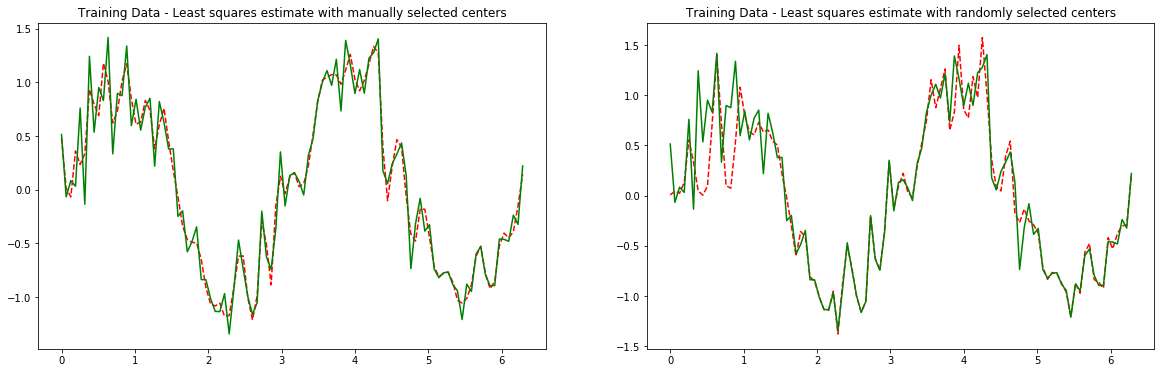

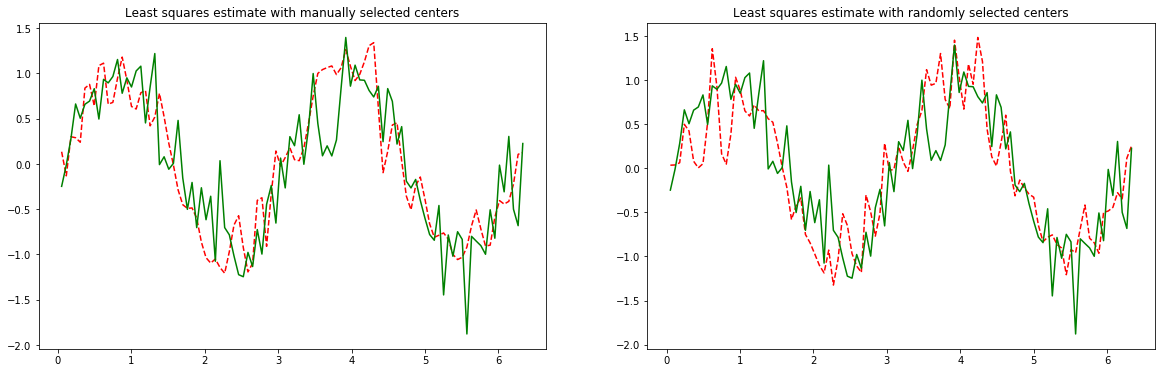

In [9]:
np.random.seed(1)
x = np.linspace(0, 2*np.pi, 100)[:,np.newaxis]
y = np.sin(2*x) + np.random.normal(0, np.sqrt(0.1), 100)[:,np.newaxis]

nCenters = 65
#select the centers homogeneously
centers = np.linspace(0, 2*np.pi, nCenters)[:,np.newaxis]
# or random
centers_random = [x[random_idx[i]] for i in range(nCenters)]
random_idx = np.random.permutation(len(x))
centers = np.array(centers)
centers_random = np.array(centers_random)

variances = 0.003*np.ones(nCenters)

RBF = RBFNet(centers, variances)
RBF.fitLeastSquares(x,y)
RBF_random_centers = RBFNet(centers_random, variances)
RBF_random_centers.fitLeastSquares(x,y)
print('Training error with manually selected centers is ', np.mean(np.abs(y - RBF.predict(x))))
print('Training error with randomly selected centers is ', np.mean(np.abs(y - RBF_random_centers.predict(x))))
fig = plt.figure(figsize=(20, 6)) 
plt.subplot(121)
plt.title('Training Data - Least squares estimate with manually selected centers')
plt.plot(x, RBF.predict(x), 'r--')
plt.plot(x,y, 'g-')
plt.subplot(122)
plt.title('Training Data - Least squares estimate with randomly selected centers')
plt.plot(x, RBF_random_centers.predict(x), 'r--')
plt.plot(x,y, 'g-')

x_test = np.linspace(0.05, 2*np.pi + 0.05, 100)[:,np.newaxis]
y_test = np.sin(2*x) + np.random.normal(0, np.sqrt(0.1), 100)[:,np.newaxis]
fig = plt.figure(figsize=(20, 6)) 
plt.subplot(121)
plt.title('Least squares estimate with manually selected centers')
plt.plot(x_test, RBF.predict(x_test), 'r--')
plt.plot(x_test,y_test, 'g-')
plt.subplot(122)
plt.title('Least squares estimate with randomly selected centers')
plt.plot(x_test, RBF_random_centers.predict(x_test), 'r--')
plt.plot(x_test,y_test, 'g-')

## Find the centers using competitive learning

In [10]:
np.random.seed(5)

In [11]:
x = np.linspace(0.00001, 2*np.pi + 0.00001, 100)[:,np.newaxis]
y = np.sin(2*x)

# randomly select our centers again
nCenters = 25
random_idx = np.random.permutation(len(x))
centers = [x[random_idx[i]] for i in range(nCenters)]
centers = np.array(centers)
centers_random = centers.copy()

In [12]:
eta_C = 0.2
for i in range(100000):
    # find the closest center vector for a random input point
    sample = x[np.random.randint(len(x))]
    distances = np.sqrt(np.sum((centers - sample)**2, axis=1))
    closest_center_idx = np.argmin(distances)
    # update that center
    delta_center = sample - centers[closest_center_idx]
    centers[closest_center_idx] += eta_C*delta_center

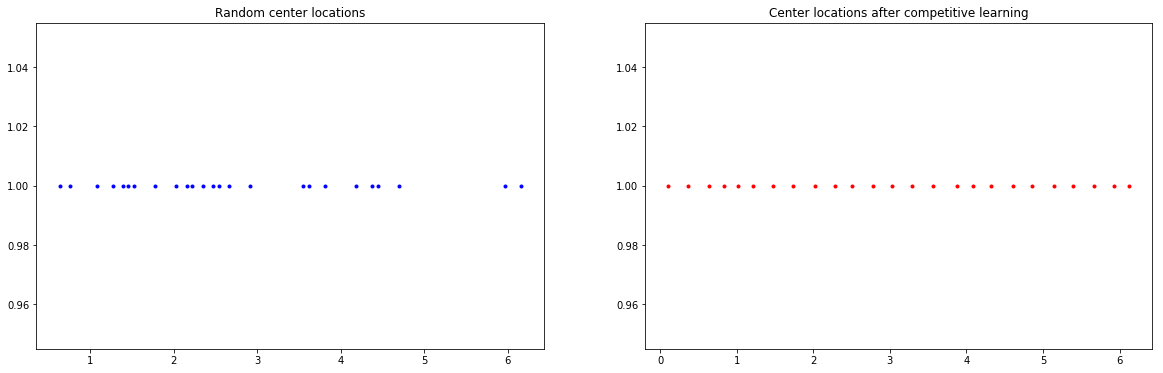

In [13]:
fig = plt.figure(figsize=(20, 6)) 
plt.subplot(121)
plt.title('Random center locations')
plt.plot(centers_random,np.ones(centers_random.shape), 'b.')
plt.subplot(122)
plt.title('Center locations after competitive learning')
plt.plot(centers,np.ones(centers.shape), 'r.')
plt.savefig('cl_centers_sinx.png')

### Comparison of Random Centers vs. CL Centers - No Noise

In [14]:
variances = 0.3*np.ones(nCenters)
RBF = RBFNet(centers, variances, epochs=1000)
RBF_random = RBFNet(centers_random, variances, epochs=1000)
RBF.fitDelta(x,y)
RBF_random.fitDelta(x,y)

Final error with competitive centers is 0.0101875666569
Final error with random centers is 0.0171970035079


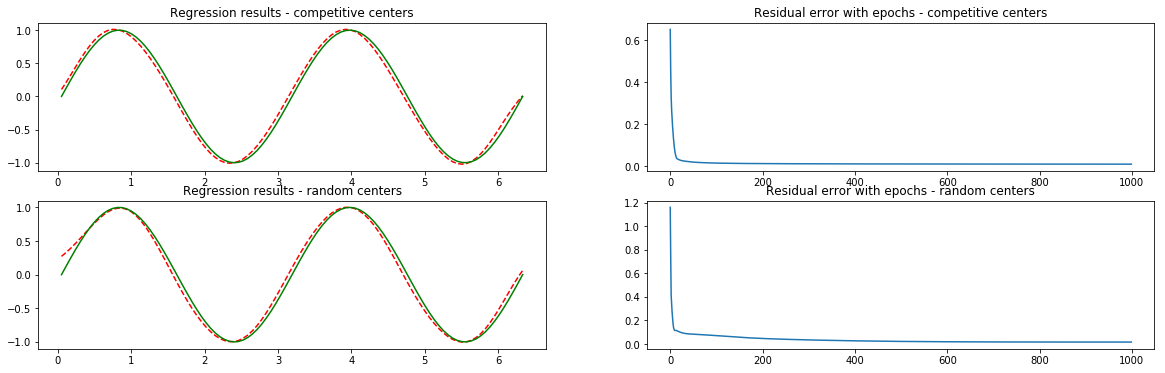

In [15]:
x_test = np.linspace(0.05, 2*np.pi + 0.05, 100)[:,np.newaxis]
y_test = np.sin(2*x)
fig = plt.figure(figsize=(20, 6)) 
plt.subplot(221)
plt.title('Regression results - competitive centers')
plt.plot(x_test, RBF.predict(x_test), 'r--')
plt.plot(x_test,y_test, 'g-')
plt.subplot(222)
plt.title('Residual error with epochs - competitive centers')
plt.plot(RBF.res_errors)
print("Final error with competitive centers is", RBF.res_errors[-1])

plt.subplot(223)
plt.title('Regression results - random centers')
plt.plot(x_test, RBF_random.predict(x_test), 'r--')
plt.plot(x_test,y_test, 'g-')
plt.subplot(224)
plt.title('Residual error with epochs - random centers')
plt.plot(RBF_random.res_errors)
print("Final error with random centers is", RBF_random.res_errors[-1])

### Comparison of Random Centers vs. CL Centers - With Noise

Noisy - Final error with competitive centers is 0.143460585704
Noisy - Final error with random centers is 0.219916489473


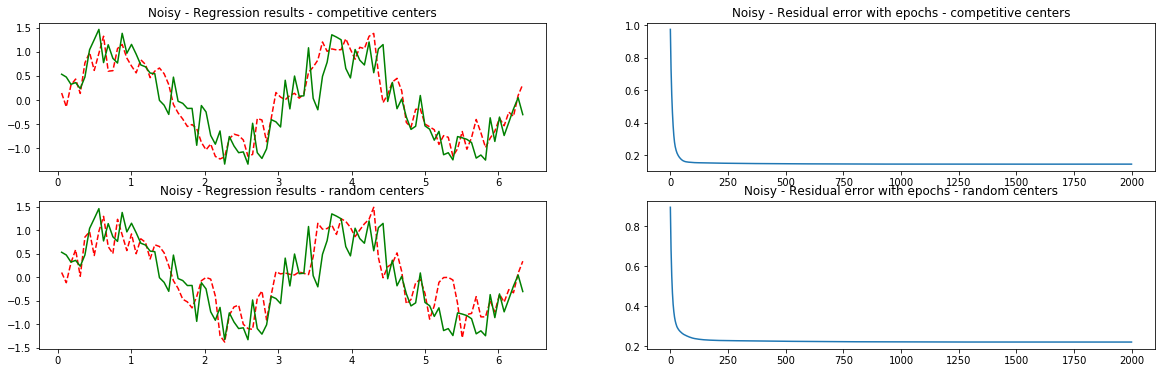

In [16]:
np.random.seed(1)

x = np.linspace(0, 2*np.pi, 100)[:,np.newaxis]
y = np.sin(2*x) + np.random.normal(0, np.sqrt(0.1), 100)[:,np.newaxis]

# randomly select our centers again
nCenters = 60
random_idx = np.random.permutation(len(x))
centers = [x[random_idx[i]] for i in range(nCenters)]
centers = np.array(centers)
centers_random = centers.copy()

eta_C = 0.2
for i in range(100000):
    # find the closest center vector for a random input point
    sample = x[np.random.randint(len(x))]
    distances = np.sqrt(np.sum((centers - sample)**2, axis=1))
    closest_center_idx = np.argmin(distances)
    # update that center
    delta_center = sample - centers[closest_center_idx]
    centers[closest_center_idx] += eta_C*delta_center

variances = 0.003*np.ones(nCenters)
RBF = RBFNet(centers, variances, epochs=2000)
RBF_random = RBFNet(centers_random, variances, epochs=2000)
RBF.fitDelta(x,y)
RBF_random.fitDelta(x,y)

x_test = np.linspace(0.05, 2*np.pi + 0.05, 100)[:,np.newaxis]
y_test = np.sin(2*x) + np.random.normal(0, np.sqrt(0.1), 100)[:,np.newaxis]

fig = plt.figure(figsize=(20, 6)) 
plt.subplot(221)
plt.title('Noisy - Regression results - competitive centers')
plt.plot(x_test, RBF.predict(x_test), 'r--')
plt.plot(x_test,y_test, 'g-')
plt.subplot(222)
plt.title('Noisy - Residual error with epochs - competitive centers')
plt.plot(RBF.res_errors)
print("Noisy - Final error with competitive centers is", RBF.res_errors[-1])

plt.subplot(223)
plt.title('Noisy - Regression results - random centers')
plt.plot(x_test, RBF_random.predict(x_test), 'r--')
plt.plot(x_test,y_test, 'g-')
plt.subplot(224)
plt.title('Noisy - Residual error with epochs - random centers')
plt.plot(RBF_random.res_errors)
print("Noisy - Final error with random centers is", RBF_random.res_errors[-1])

### Try 2D data

In [69]:
import csv

In [70]:
angle_vel = []
dist_height = []
with open('ballist.dat', 'r') as File:
    output = csv.reader(File, delimiter='\t')
    for row in output:
        angle_vel.append(np.fromstring(row[0], dtype=float, sep=' '))
        dist_height.append(np.fromstring(row[1], dtype=float, sep=' '))
angle_vel = np.array(angle_vel)
dist_height = np.array(dist_height)

In [71]:
angle_vel_test = []
dist_height_test = []
with open('balltest.dat', 'r') as File:
    output = csv.reader(File, delimiter='\t')
    for row in output:
        angle_vel_test.append(np.fromstring(row[0], dtype=float, sep=' '))
        dist_height_test.append(np.fromstring(row[1], dtype=float, sep=' '))
angle_vel_test = np.array(angle_vel_test)
dist_height_test = np.array(dist_height_test)

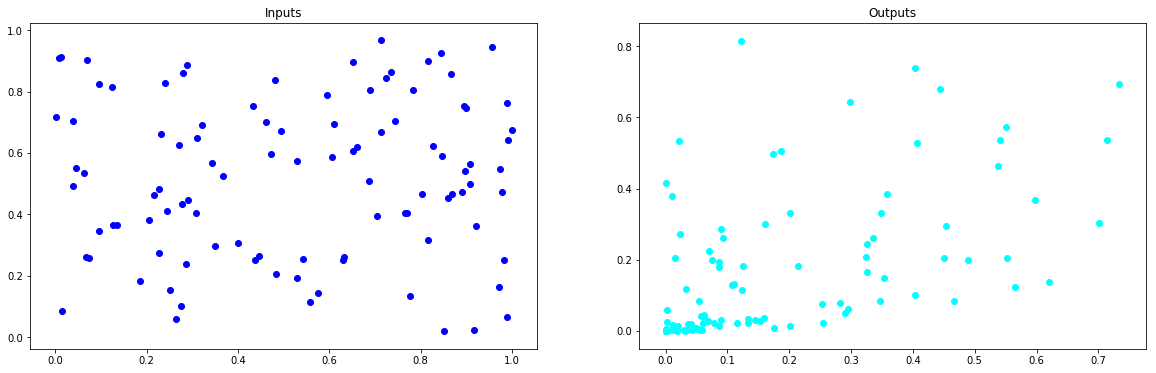

In [72]:
fig = plt.figure(figsize=(20,6))
plt.subplot(121)
plt.title('Inputs')
plt.scatter(angle_vel[:,0],angle_vel[:,1], color='blue')
plt.subplot(122)
plt.title('Outputs')
plt.scatter(dist_height[:,0],dist_height[:,1], color='cyan')

In [73]:
np.random.seed(5)

In [74]:
# randomly select our centers again
nCenters = 20
random_idx = np.random.permutation(len(angle_vel))
centers = [angle_vel[random_idx[i]] for i in range(nCenters)]
centers = np.array(centers)
centers_random = centers.copy()

In [75]:
from scipy.spatial import Voronoi, voronoi_plot_2d

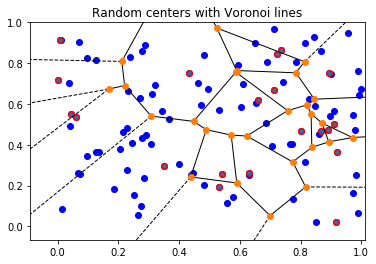

In [76]:
vor = Voronoi(centers_random)
a = voronoi_plot_2d(vor)
plt.scatter(angle_vel[:,0],angle_vel[:,1], color='blue')
plt.scatter(centers_random[:,0],centers_random[:,1], color='red')
plt.title('Random centers with Voronoi lines')
plt.savefig('random_centers_ballistics.png')

In [77]:
eta_C = 0.2
for i in range(100000):
    # find the closest center vector for a random input point
    sample = angle_vel[np.random.randint(len(angle_vel))]
    distances = np.sqrt(np.sum((centers - sample)**2, axis=1))
    closest_center_idx = np.argmin(distances)
    # update that center
    delta_center = sample - centers[closest_center_idx]
    centers[closest_center_idx] += eta_C*delta_center

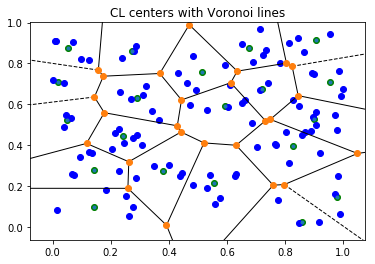

In [78]:
vor = Voronoi(centers)
_ = voronoi_plot_2d(vor)
plt.scatter(centers[:,0],centers[:,1], color='green')
plt.scatter(angle_vel[:,0],angle_vel[:,1], color='blue')
plt.title('CL centers with Voronoi lines')
plt.savefig('cl_centers_ballistics.png')

In [27]:
# find the closest center idx's for each point in the input set
closest_centers = np.argmin(np.array([np.linalg.norm(angle_vel - center, axis=1) \
                                      for center in centers]), axis=0)
variances=np.zeros(centers.shape[0])
# for each group located at a center, find the spatial variance of that group
for i in range(centers.shape[0]):
    variances[i] = np.linalg.norm(angle_vel[closest_centers==i] - np.mean(angle_vel[closest_centers==i],\
                                                                          axis=0), axis=1).mean()

In [28]:
variances_random = 0.02*np.ones(centers.shape[0])
RBF_random = RBFNet(centers_random, variances_random, epochs=1000)
RBF_random.fitDelta(angle_vel,dist_height)
RBF = RBFNet(centers, variances, epochs=1000)
RBF.fitDelta(angle_vel,dist_height)

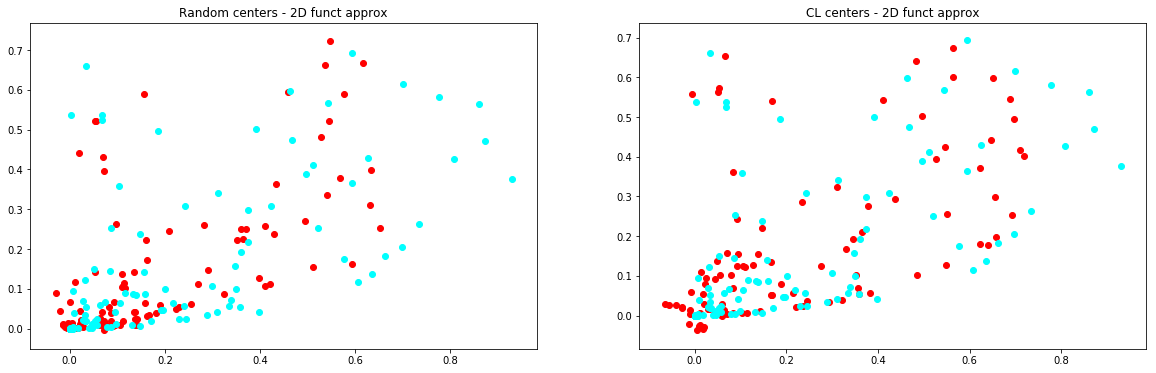

In [29]:
fig = plt.figure(figsize=(20,6))
plt.subplot(121)
plt.scatter(RBF_random.predict(angle_vel_test)[:,0], RBF_random.predict(angle_vel_test)[:,1],color='red')
plt.scatter(dist_height_test[:,0],dist_height_test[:,1], color='cyan')
plt.title('Random centers - 2D funct approx')
plt.subplot(122)
plt.scatter(RBF.predict(angle_vel_test)[:,0], RBF.predict(angle_vel_test)[:,1],color='red')
plt.scatter(dist_height_test[:,0],dist_height_test[:,1], color='cyan')
plt.title('CL centers - 2D funct approx')

Final error with competitive centers is 0.0139945433705


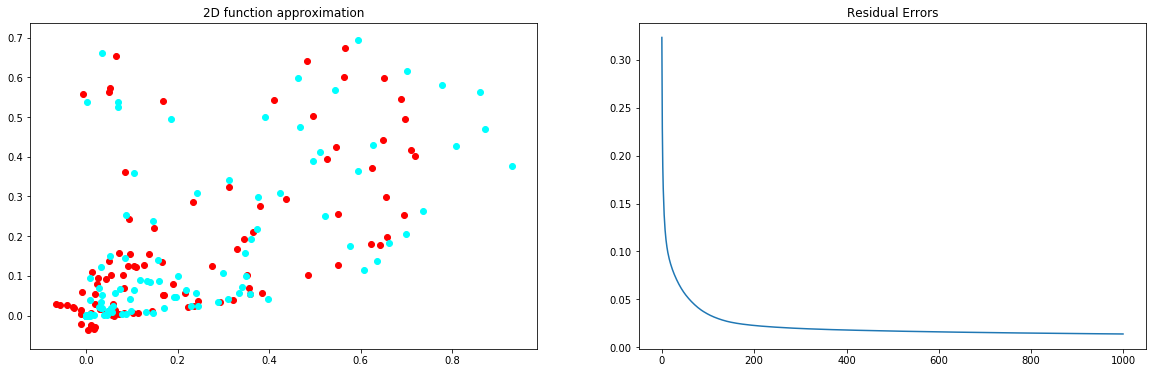

In [30]:
fig = plt.figure(figsize=(20,6))
plt.subplot(121)
plt.scatter(RBF.predict(angle_vel_test)[:,0], RBF.predict(angle_vel_test)[:,1],color='red')
plt.scatter(dist_height_test[:,0],dist_height_test[:,1], color='cyan')
plt.title('2D function approximation')
plt.subplot(122)
plt.plot(RBF.res_errors)
plt.title('Residual Errors')
print("Final error with competitive centers is", RBF.res_errors[-1])

# Self Organizing Maps

## 1D Map - Animals

In [31]:
# read some data
animals=[]
with open('animals.dat', 'r') as File:
    output = csv.reader(File, delimiter='\t')
    for row in output:
        animals.append(np.fromstring(row[0], dtype=int, sep=','))
# reshape to 32 animals with 84 binary attributes
animals = np.asarray(animals).reshape((32,84))

In [32]:
# this is just cosmetics - labels of the animals in text form
# pig, dog, etc.
animal_names=[]
with open('animalnames.txt', 'r') as File:
    output = csv.reader(File, delimiter='\'')
    for row in output:
        animal_names.append(row[1])

In [33]:
np.random.seed(1)
centers = np.random.rand(100,84)

In [34]:
radius_init = 50
tau = 5
eta_C = 0.2

for epoch in range(20):
    radius = np.int(np.exp(-epoch/tau)*radius_init)    
    # find the closest center vector to each input point (animals)
    for animal_idx in range(32):
        sample = animals[animal_idx]
        distances = np.sqrt(np.sum((centers - sample)**2, axis=1))
        closest_center_idx = np.argmin(distances)
        # update the center (and some of its neighbors) closest to this animal
        for center_idx in range(100):            
            node_distance = np.abs(closest_center_idx-center_idx)            
            if node_distance <= radius:
                update_rate = eta_C*np.exp(-node_distance**2 / radius)
                delta_center = sample - centers[center_idx]
                centers[center_idx] += update_rate*delta_center

In [35]:
# find the indexes of the centers closest to each animal
idxs = []
for animal_idx in range(32):
    sample = animals[animal_idx]
    distances = np.sqrt(np.sum((centers - sample)**2, axis=1))
    closest_center_idx = np.argmin(distances)
    idxs.append(closest_center_idx)
idxs = np.array(idxs)

In [36]:
# print the names of the animals starting from
# the smallest closest_center index, in ascending order
for name_idx in np.argsort(idxs):
    print(animal_names[name_idx])

dragonfly
grasshopper
beetle
butterfly
housefly
moskito
spider
pelican
duck
ostrich
penguin
frog
seaturtle
crocodile
walrus
bear
dog
hyena
skunk
ape
lion
cat
rat
rabbit
bat
elephant
kangaroo
horse
camel
giraffe
pig
antelop


## 1D Map (but cyclic) - Cities

In [37]:
city_locations = []
with open('cities.dat', 'r') as File:
    output = csv.reader(File, delimiter='\t')
    row_num = 0
    for row in output:
        if row_num < 4:
            row_num += 1
        else:
            city_locations.append(np.fromstring(row[0], dtype=float, sep=','))
city_locations = np.asarray(city_locations)

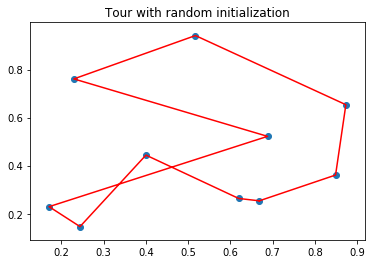

In [38]:
np.random.seed(2)
centers = np.random.rand(10,2)
# find the indexes of the centers closest to each city
idxs = []
for city_idx in range(10):
    sample = city_locations[city_idx]
    distances = np.sqrt(np.sum((centers - sample)**2, axis=1))
    closest_center_idx = np.argmin(distances)
    idxs.append(closest_center_idx)
idxs = np.array(idxs)

ordered_cities = []
for city_idx in np.argsort(idxs):
    ordered_cities.append(city_locations[city_idx])
ordered_cities = np.asarray(ordered_cities)
# this is just a visualization trick,
# last center = first center s.t. they form a loop
ordered_cities = np.vstack([ordered_cities, ordered_cities[0]])

plt.scatter(city_locations[:,0], city_locations[:,1])
plt.plot(ordered_cities[:,0], ordered_cities[:,1], 'r-')
plt.title('Tour with random initialization')
plt.savefig('random_tour.png')

In [39]:
radius_init = 2
for epoch in range(20):
    radius = int((20 - epoch)/7)
    for city_idx in range(10):
        sample = city_locations[city_idx]
        distances = np.sqrt(np.sum((centers - sample)**2, axis=1))
        closest_center_idx = np.argmin(distances)
        
        for center_idx in range(10):
            node_distance = np.abs(closest_center_idx-center_idx)  
            node_distance = np.abs(node_distance%-10) \
                            if np.abs(node_distance%-10) < np.abs(node_distance%10) \
                            else np.abs(node_distance%10)
            if node_distance <= radius:
                update_rate = eta_C*np.exp(-node_distance**2 / (radius+1))
                delta_center = sample - centers[center_idx]
                centers[center_idx] += update_rate*delta_center

In [40]:
# find the indexes of the centers closest to each city
idxs = []
for city_idx in range(10):
    sample = city_locations[city_idx]
    distances = np.sqrt(np.sum((centers - sample)**2, axis=1))
    closest_center_idx = np.argmin(distances)
    idxs.append(closest_center_idx)
idxs = np.array(idxs)

In [41]:
ordered_cities = []
for city_idx in np.argsort(idxs):
    ordered_cities.append(city_locations[city_idx])
ordered_cities = np.asarray(ordered_cities)
ordered_cities = np.vstack([ordered_cities, ordered_cities[0]])

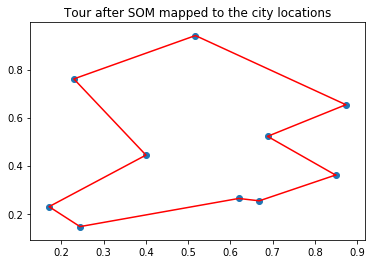

In [42]:
plt.scatter(city_locations[:,0], city_locations[:,1])
plt.plot(ordered_cities[:,0], ordered_cities[:,1], 'r-')
plt.title('Tour after SOM mapped to the city locations')
plt.savefig('SOM_tour.png')

## 2D Map - Votes

In [43]:
# read some data
votes = []
with open('votes.dat', 'r') as File:
    output = csv.reader(File, delimiter='\t')
    for row in output:
        votes.append(np.fromstring(row[0], dtype=float, sep=','))
# reshape to 349 MPs, each voted 31 times
votes = np.asarray(votes).reshape((349,31))

In [44]:
np.random.seed(2)
centers = np.random.rand(10, 10,31)

In [45]:
def nodeDistance(center_idx, closest_center_idx):
    center_i = int(center_idx/10)
    center_j = center_idx%10
    
    closeset_i = int(closest_center_idx/10)
    closeset_j = closest_center_idx%10
    
    node_distance = np.sqrt(np.sum((np.array([center_i,center_j]) - np.array([closeset_i,closeset_j]))**2))
    return node_distance

In [46]:
radius_init = 5
tau = 10
eta_C = 0.2

for epoch in range(20):
    radius = np.int(np.exp(-epoch/tau)*radius_init)
    # for each input point (MPs), find the closest center point
    for sample in votes:
        distances = np.sqrt(np.sum((centers - sample)**2, axis=2))
        closest_center_idx = np.argmin(distances)
        # update the center (and some of its neighbors) closest to this MP
        for center_idx in range(100):            
            node_distance = nodeDistance(center_idx, closest_center_idx)            
            if node_distance <= radius:
                update_rate = eta_C*np.exp(-node_distance**2 / (radius+1))
                delta_center = sample - centers[int(center_idx/10), center_idx%10]
                centers[int(center_idx/10), center_idx%10] += update_rate*delta_center

In [47]:
idxs = []
for sample in votes:
    distances = np.sqrt(np.sum((centers - sample)**2, axis=2))
    closest_center_idx = np.argmin(distances)
    idxs.append([int(closest_center_idx/10), closest_center_idx%10])
idxs = np.array(idxs)

In [48]:
SOM_positions = np.unique(idxs,axis=0)
indexes_of_MPs_at_SOM_positions = [np.where((idxs == this_SOM_point).all(axis=1)) \
                                   for this_SOM_point in SOM_positions]

In [49]:
sexes = []
with open('mpsex.dat', 'r') as File:
    output = csv.reader(File, delimiter='\t')
    row_num = 0
    for row in output:
        if row_num < 2:
            row_num += 1
        else:
            sexes.append(np.fromstring(row[1], dtype=int, sep=','))
sexes = np.asarray(sexes).squeeze()

In [50]:
parties = []
with open('mpparty.dat', 'r') as File:
    output = csv.reader(File, delimiter='\t')
    row_num = 0
    for row in output:
        if row_num < 3:
            row_num += 1
        else:
            parties.append(np.fromstring(row[1], dtype=int, sep=','))
parties = np.asarray(parties).squeeze()

In [51]:
districts = []
with open('mpdistrict.dat', 'r') as File:
    output = csv.reader(File, delimiter='\t')
    for row in output:
        districts.append(np.fromstring(row[1], dtype=int, sep=','))
districts = np.asarray(districts).squeeze()

In [52]:
colors_Sex = sexes
colors_Party = parties
colors_District = districts

In [53]:
MP = np.zeros((349,2))
for this_SOM_point, MPs_close_to_this_SOM_point in zip(SOM_positions,indexes_of_MPs_at_SOM_positions):
    #print('At SOM position', this_SOM_point)
    #print('We have these MPs:', MPs_close_to_this_SOM_point[0])
    for MP_idx in MPs_close_to_this_SOM_point[0]:
        MP[MP_idx] = np.random.rand(1,2) + this_SOM_point

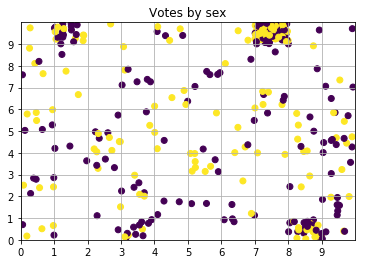

In [54]:
plt.scatter(MP[:,0], MP[:,1], c=colors_Sex) 
plt.grid(True)
plt.xticks(np.arange(0, 10))
plt.yticks(np.arange(0, 10))
plt.xlim(0,10)
plt.ylim(0,10)
plt.title('Votes by sex')
plt.savefig('votes_by_sex.png')

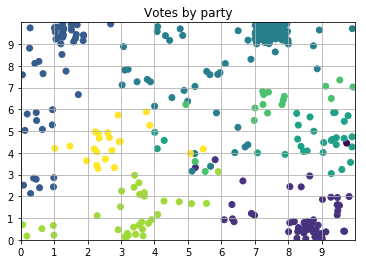

In [55]:
plt.scatter(MP[:,0], MP[:,1], c=colors_Party) 
plt.grid(True)
plt.xticks(np.arange(0, 10))
plt.yticks(np.arange(0, 10))
plt.xlim(0,10)
plt.ylim(0,10)
plt.title('Votes by party')
plt.savefig('votes_by_party.png')

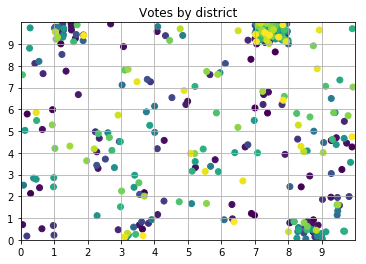

In [56]:
plt.scatter(MP[:,0], MP[:,1], c=colors_District) 
plt.grid(True)
plt.xticks(np.arange(0, 10))
plt.yticks(np.arange(0, 10))
plt.xlim(0,10)
plt.ylim(0,10)
plt.title('Votes by district')
plt.savefig('votes_by_district.png')

# Play around

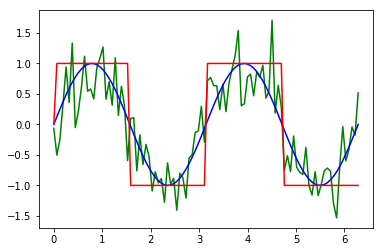

In [57]:
x = np.linspace(0, 2*np.pi, 100)[:,np.newaxis]
y_true = np.sin(2*x)
# add noise
y = y_true + np.random.normal(0, np.sqrt(0.1), 100)[:,np.newaxis]
# or not
# y = y_true
plt.plot(x,y, 'g')
plt.plot(x,y_true, 'b')
plt.plot(x,np.sign(y_true), 'r')

0.1301477559864449

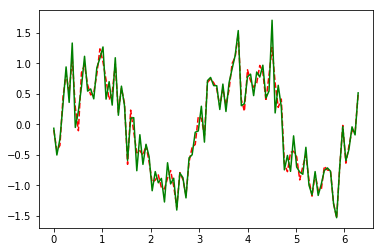

In [58]:
np.random.seed(1)
random_idx = np.random.permutation(len(x))
# play with this one
nCenters = 80
#select the centers homogeneously
centers = np.linspace(0, 2*np.pi, nCenters)[:,np.newaxis]
# or random
#centers = [x[random_idx[i]] for i in range(nCenters)]
var = 0.003*np.ones(nCenters)

Phi = np.array([rbf(x, center, var) for center,var in zip(centers, var)])
weights = np.linalg.pinv(Phi).T.dot(y)
predictions = weights.T.dot(Phi).T

plt.plot(x,predictions, 'r--')
plt.plot(x,y, 'g-')
#avg_res_error
np.mean(np.abs(y - predictions))#+ bias*np.ones((Phi.shape[1],1)))))

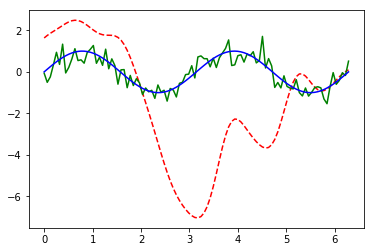

In [59]:
np.random.seed(1)
random_idx = np.random.permutation(len(x))
# play with this one
nCenters = 100
#select the centers homogeneously
centers = np.linspace(0, 2*np.pi, nCenters)[:,np.newaxis]
# or random
#centers = [x[random_idx[i]] for i in range(nCenters)]
var = 0.1*np.ones(nCenters)

Phi = np.array([rbf(x, center, var) for center,var in zip(centers, var)])
weights = np.random.normal(0,1, np.array(centers).shape)
#bias = np.random.normal(0,1, 1)[:,np.newaxis]

predictions = Phi.T.dot(weights) #+ bias*np.ones((Phi.shape[1],1))
plt.plot(x,predictions, 'r--')
plt.plot(x,y, 'g-')
plt.plot(x,y_true, 'b')

In [60]:
#avg_res_error
np.mean(np.abs(y_true - (Phi.T.dot(weights) )))#+ bias*np.ones((Phi.shape[1],1)))))

2.4347627046907809

In [61]:
eta = 0.05
epochs = 1000
res_errors = []
for _ in range(epochs):
    for i in range(len(x)):
        error =  y[i] - (Phi[:,i].T.dot(weights))# + bias)
        error = error.reshape(-1,1)
        delta_weight = Phi[:,i][:,np.newaxis].dot(error)
        #delta_bias = error.sum()
        weights += eta*delta_weight
        #bias += eta*delta_bias
    
    avg_res_error = np.mean(np.abs(y - (Phi.T.dot(weights))))# + bias*np.ones((Phi.shape[1],1)))))
    res_errors.append(avg_res_error)

Final error is 0.26353807226


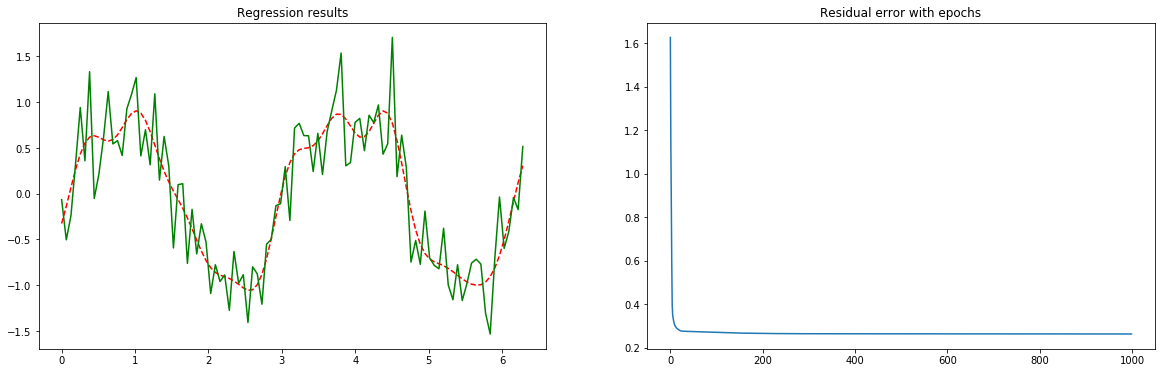

In [62]:
predictions = Phi.T.dot(weights) #+ bias*np.ones((Phi.shape[1],1))
fig = plt.figure(figsize=(20, 6)) 
plt.subplot(121)
plt.plot(x,predictions, 'r--')
plt.plot(x,y, 'g-')
plt.title('Regression results')
plt.subplot(122)
plt.title('Residual error with epochs')
plt.plot(res_errors)
print("Final error is",res_errors[-1])

In [63]:
from sklearn.neural_network import MLPRegressor
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

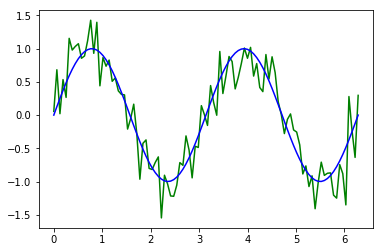

In [64]:
#np.random.seed(1)
x = np.linspace(0, 2*np.pi, 100)[:,np.newaxis]
y_true = np.sin(2*x)
# add noise
y = y_true + np.random.normal(0, np.sqrt(0.1), 100)[:,np.newaxis]
# or not
# y = y_true
plt.plot(x,y, 'g')
plt.plot(x,y_true, 'b')

In [65]:
nn_heter = MLPRegressor((70,10), activation='logistic', solver='lbfgs',\
                  random_state=9, alpha=0, momentum=0, max_iter=20000)
nn = MLPRegressor((40,40), activation='logistic', solver='lbfgs',\
                  random_state=9, alpha=0, momentum=0, max_iter=20000)

In [66]:
nn_heter.fit(x,y.ravel())
nn.fit(x,y.ravel())

MLPRegressor(activation='logistic', alpha=0, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(40, 40), learning_rate='constant',
       learning_rate_init=0.001, max_iter=20000, momentum=0,
       nesterovs_momentum=True, power_t=0.5, random_state=9, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

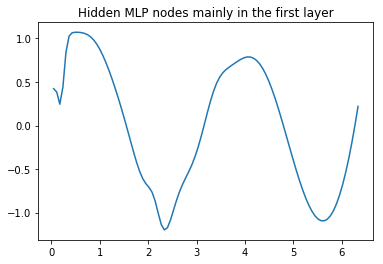

In [67]:
x_test = np.linspace(0.05, 2*np.pi + 0.05, 100)[:,np.newaxis]
y_test = np.sin(2*x_test) + np.random.normal(0, np.sqrt(0.1), 100)[:,np.newaxis]
plt.plot(x_test,nn_heter.predict(x_test))
#plt.plot(x_test, y_test, 'r-')
plt.title('Hidden MLP nodes mainly in the first layer')
plt.savefig('MLP_heterogeneous.png')

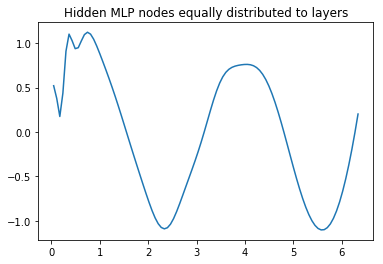

In [68]:
plt.plot(x_test,nn.predict(x_test))
#plt.plot(x_test, y_test, 'r-')
plt.title('Hidden MLP nodes equally distributed to layers')
plt.savefig('MLP_homogeneous.png')